# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


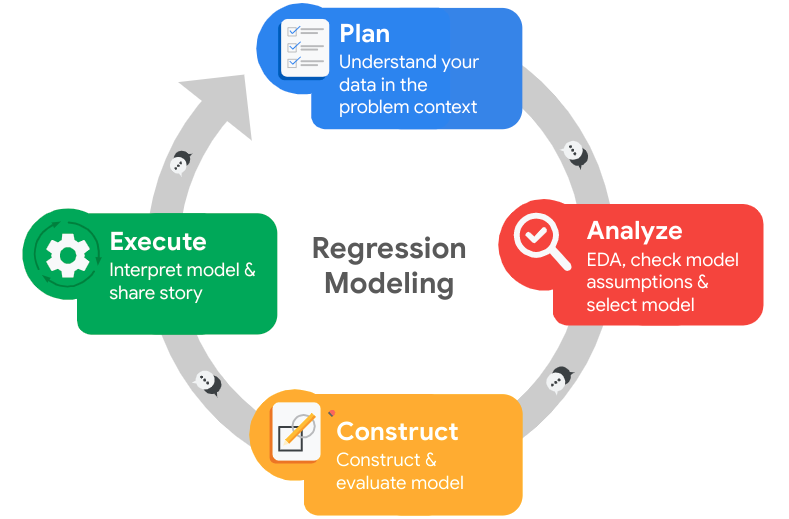

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

**1. Who are your stakeholders for this project?**

- Senior Leadership Team at Salifort Motors.
- Human Resources Department.
- Potentially, Department Managers and Employees.


**2. What are you trying to solve or accomplish?**

- Predict employee turnover (departure) at Salifort Motors.
- Identify key factors contributing to employee turnover.
- Develop actionable recommendations to increase employee retention.
- Save the company money by reducing the amount of employee turnover.


**3. What are your initial observations when you explore the data?**

This will depend on the actual dataset provided, but generally, we'd look for:
- Distribution of employee turnover (ratio of employees who left vs. stayed).
- Correlation between variables (e.g., monthly hours vs. turnover).
- Categorical variable distributions (e.g., turnover by department).
- Missing values and outliers.


**4. What resources do you find yourself using as you complete this stage?** 

- Python libraries:
  - `pandas` (for data manipulation): https://pandas.pydata.org/
  - `NumPy` (for numerical operations): https://numpy.org/
  - `scikit-learn` (for machine learning models): https://scikit-learn.org/stable/
  - `matplotlib` and `seaborn` (for data visualization): https://matplotlib.org/ , https://seaborn.pydata.org/
  - `XGBoost` (if used) : https://xgboost.readthedocs.io/en/stable/
- Documentation for the used libraries.
- Online tutorials and articles about machine learning and statistical modeling.


**5. Do you have any ethical considerations in this stage?**


- **Privacy:** Ensuring employee data is handled confidentially and securely.
- **Bias:** Being aware of potential biases in the data or model that could lead to unfair or discriminatory outcomes.
- **Transparency:** Communicating the model's limitations and potential biases to stakeholders.
- **Use of Results:** Ensuring the model is used to support employees, not to punish or discriminate against them.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# operational packages
import pandas as pd
import numpy as np
import time
from scipy import stats

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model_selection packages for creating the training set and testing set and searching over hyperparameters of estimators
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# functions for computing model metrics and displaying them
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, \
    classification_report, balanced_accuracy_score, cohen_kappa_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# xgboost classifier
from xgboost import XGBClassifier, plot_importance, DMatrix

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
rename_columns = {"time_spend_company": "tenure", 
          "Department": "department", 
          "promotion_last_5years": "recently_promoted",
          "satisfaction_level": "satisfaction",
          "Work_accident": "work_accident",
          "number_project": "number_projects",
          "average_montly_hours": "avg_monthly_hours"}

df0 = df0.rename(columns=rename_columns)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_evaluation', 'number_projects',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'recently_promoted', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
tot_missing = df0.isna().sum().sum()
print("Total missing values: " + str(tot_missing))

Total missing values: 0


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0.duplicated()
print("Number of duplicate rows: " + str(duplicates.sum()))

Number of duplicate rows: 3008


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[duplicates].sort_values(by=["satisfaction", "last_evaluation"]).head(10)

,satisfaction,last_evaluation,number_projects,avg_monthly_hours,tenure,work_accident,left,recently_promoted,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12397,0.09,0.79,6,293,5,0,1,0,sales,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_dropped_duplicates = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_dropped_duplicates.head()

,satisfaction,last_evaluation,number_projects,avg_monthly_hours,tenure,work_accident,left,recently_promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

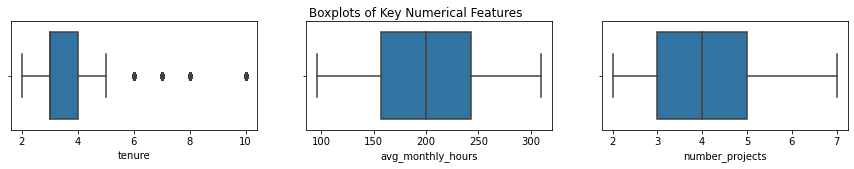

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots of Key Numerical Features')
sns.boxplot(ax=axes[0], x=df_dropped_duplicates['tenure'])
sns.boxplot(ax=axes[1], x=df_dropped_duplicates['avg_monthly_hours'])
sns.boxplot(ax=axes[2], x=df_dropped_duplicates['number_projects'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
def identify_outliers(df, columns):
    outliers = df[columns].copy()

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_thresh = q3 + 1.5*iqr
        lower_thresh = q1 - 1.5*iqr
        outliers[column] = (df[column] > upper_thresh) | (df[column] < lower_thresh)
    return outliers

outlier_mask = identify_outliers(df_dropped_duplicates, ["tenure","avg_monthly_hours","number_projects"])

print("Outlier row count: ")
print(outlier_mask.sum())

Outlier row count: 
tenure               824
avg_monthly_hours      0
number_projects        0
dtype: int64


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.

**1. What did you observe about the relationships between variables?**

- **Satisfaction and Turnover:** There's a strong negative correlation, indicating that lower satisfaction significantly increases the likelihood of employees leaving.
- **Average Monthly Hours and Turnover:** Employees working longer hours tend to have a slightly higher probability of leaving.
- **Tenure and Turnover:** Surprisingly, longer tenure is positively correlated with leaving, suggesting potential issues with long-term employee retention.
- **Salary and Turnover:** Employees with lower salaries are significantly more likely to leave, highlighting the importance of competitive compensation.
- **Department and Turnover:** Certain departments (Sales, Technical, Support) have notably higher turnover rates, indicating department-specific issues.
- **Project Load and Hours:** A strong positive correlation between project load and monthly hours suggests that employees with more projects also work longer hours.
- **Work accidents and turnover:** Employees who have had work related accidents are slightly less likely to leave.
- **Last evaluation and number of projects:** Employees with more projects tend to have higher evaluations.


**2. What do you observe about the distributions in the data?**

- **Imbalanced Target Variable:** The 'left' variable is heavily imbalanced, with significantly more employees staying than leaving. This imbalance needs to be addressed during model training to prevent biased models.
- **Skewed Satisfaction:** The satisfaction level distribution is skewed towards lower values, indicating a potential widespread issue with employee satisfaction.
- **Tenure Distribution:** The tenure distribution shows outliers, particularly among employees who stayed, with some employees having very long tenure.
- **Monthly Hours Distribution:** The distribution of monthly hours shows some outliers with extremely high hours.
- **Number of projects distribution:** The distribution of the number of projects shows some outliers with employees having a high number of projects.

**3. What transformations did you make with your data? Why did you choose to make those decisions?**

- **Renamed Columns:** Columns were renamed to be more descriptive and in snake_case for consistency and readability.
- **Dropped Duplicates:** Duplicate rows were removed to ensure data integrity and prevent skewed analysis. This significantly impacted the perceived turnover rate.


**4. What are some purposes of EDA before constructing a predictive model?**

- **Understanding Data Structure:** EDA helps to understand the data's structure, distributions, and relationships between variables.
- **Identifying Data Quality Issues:** It allows for the detection of missing values, outliers, and inconsistencies that need to be addressed.
- **Feature Selection and Engineering:** EDA provides insights for feature selection and engineering, which can improve model performance.
- **Informing Model Selection:** The characteristics of the data can influence the choice of model.
- **Gaining Business Insights:** EDA can reveal patterns and trends that are relevant to the business problem.

**5. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**

- **Course documentation.**
- `pandas`: For data manipulation and analysis (https://pandas.pydata.org/)
- `matplotlib` & `seaborn`: For data visualization (https://matplotlib.org/, https://seaborn.pydata.org/)
- `scikit-learn`: For machine learning preprocessing and evaluation (https://scikit-learn.org/stable/)
- `NumPy`: For numerical operations (https://numpy.org/)
- **Python documentation:** For general Python syntax and libraries.
- **YouTube:** For visual tutorials and practical demonstrations of data analysis and visualization.

**6. Do you have any ethical considerations in this stage?**

- **Data Privacy:** Ensuring that employee data is handled securely and confidentially.
- **Bias Awareness:** Being mindful of potential biases in the data that could lead to unfair or discriminatory outcomes.
- **Transparency:** Communicating any data limitations or potential biases to stakeholders.
- **Responsible Interpretation:** Avoiding misinterpretations of data that could negatively impact employees.
- **Data Accuracy:** Ensuring that the data being analyzed is accurate and representative.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
# Calculate the number of employees who left the company AFTER dropping duplicate rows.
left_count_dropped_duplicates = df_dropped_duplicates["left"].sum()

# Calculate the number of employees who stayed with the company AFTER dropping duplicate rows.
stayed_count_dropped_duplicates = (1 - df_dropped_duplicates["left"]).sum()

# Calculate the number of employees who left the company in the ORIGINAL DataFrame (before dropping duplicates).
left_count_original = df0["left"].sum()

# Calculate the number of employees who stayed with the company in the ORIGINAL DataFrame (before dropping duplicates).
stayed_count_original = (1 - df0["left"]).sum()

print("Employee Turnover Analysis:")
print("-" * 30)

print("After Dropping Duplicates:")
print(f"  - Employees who left: {left_count_dropped_duplicates}")
print(f"  - Employees who stayed: {stayed_count_dropped_duplicates}")

print("\nBefore Dropping Duplicates:")
print(f"  - Employees who left: {left_count_original}")
print(f"  - Employees who stayed: {stayed_count_original}")

print("-" * 30)

# Calculate and print the difference in the 'left' count between the original and de-duplicated DataFrames.
print(f"Difference in 'left' count: {left_count_original - left_count_dropped_duplicates}")

# Calculate and print the difference in the 'stayed' count between the original and de-duplicated DataFrames.
print(f"Difference in 'stayed' count: {stayed_count_original - stayed_count_dropped_duplicates}")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
# Calculate the total number of employees in the de-duplicated DataFrame.
total_employees_dropped_duplicates = len(df_dropped_duplicates)

# Calculate the percentage of employees who left AFTER dropping duplicates.
percent_left_dropped_duplicates = (left_count_dropped_duplicates / total_employees_dropped_duplicates) * 100

# Calculate the percentage of employees who stayed AFTER dropping duplicates.
percent_stayed_dropped_duplicates = (stayed_count_dropped_duplicates / total_employees_dropped_duplicates) * 100

# Calculate the total number of employees in the original DataFrame.
total_employees_original = len(df0)

# Calculate the percentage of employees who left in the ORIGINAL DataFrame.
percent_left_original = (left_count_original / total_employees_original) * 100

# Calculate the percentage of employees who stayed in the ORIGINAL DataFrame.
percent_stayed_original = (stayed_count_original / total_employees_original) * 100

print("Employee Turnover Percentages:")
print("-" * 30)

print("After Dropping Duplicates:")
print(f"  - Percentage of employees who left: {percent_left_dropped_duplicates:.2f}%")
print(f"  - Percentage of employees who stayed: {percent_stayed_dropped_duplicates:.2f}%")

print("\nBefore Dropping Duplicates:")
print(f"  - Percentage of employees who left: {percent_left_original:.2f}%")
print(f"  - Percentage of employees who stayed: {percent_stayed_original:.2f}%")

print("-" * 30)

Employee Turnover Analysis:
------------------------------
After Dropping Duplicates:
  - Employees who left: 1991
  - Employees who stayed: 10000

Before Dropping Duplicates:
  - Employees who left: 3571
  - Employees who stayed: 11428
------------------------------
Difference in 'left' count: 1580
Difference in 'stayed' count: 1428
Employee Turnover Percentages:
------------------------------
After Dropping Duplicates:
  - Percentage of employees who left: 16.60%
  - Percentage of employees who stayed: 83.40%

Before Dropping Duplicates:
  - Percentage of employees who left: 23.81%
  - Percentage of employees who stayed: 76.19%
------------------------------


#### Conclusion:

The analysis reveals a significant impact of duplicate data on turnover rates. After removing duplicates, the proportion of employees who left the company decreased from 23.81% to 16.60%. This indicates that the presence of duplicates inflated the perceived turnover rate. The actual turnover, after cleaning the data, shows that approximately 16.60% of employees left, while 83.40% remained. This corrected view provides a more accurate representation of employee retention at the company and should be used as a basis for further analysis and HR strategy development.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
# Correlation Heatmap Data
correlation_data = df_dropped_duplicates.corr()
print("Correlation Data:")
correlation_data

Correlation Data:


,satisfaction,last_evaluation,number_projects,avg_monthly_hours,tenure,work_accident,left,recently_promoted
satisfaction,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avg_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
recently_promoted,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [15]:
# Example of Quantifying Relationships:
correlation_satisfaction_left = df_dropped_duplicates['satisfaction'].corr(df_dropped_duplicates['left'])
print(f"Correlation between satisfaction and left: {correlation_satisfaction_left:.2f}")

# Distribution of 'left' Data
left_distribution_data = df_dropped_duplicates['left'].value_counts()
print("Distribution of 'left' Data:")
print(left_distribution_data)
print("\n" + "-" * 50 + "\n")

# Distribution of satisfaction levels Data
satisfaction_distribution_data = df_dropped_duplicates['satisfaction'].describe()
print("Distribution of satisfaction levels Data:")
print(satisfaction_distribution_data)
print("\n" + "-" * 50 + "\n")

# Department vs. Left Data
department_left_data = df_dropped_duplicates.groupby('department')['left'].value_counts().unstack()
print("Department vs. Left Data:")
print(department_left_data)
print("\n" + "-" * 50 + "\n")

# Salary vs. Left Data
salary_left_data = df_dropped_duplicates.groupby('salary')['left'].value_counts().unstack()
print("Salary vs. Left Data:")
print(salary_left_data)
print("\n" + "-" * 50 + "\n")

# Tenure vs. Left Data (using describe for summary)
tenure_left_data = df_dropped_duplicates.groupby('left')['tenure'].describe()
print("Tenure vs. Left Data:")
print(tenure_left_data)
print("\n" + "-" * 50 + "\n")

# Avg Monthly Hours vs. Left Data (using describe for summary)
avg_monthly_hours_left_data = df_dropped_duplicates.groupby('left')['avg_monthly_hours'].describe()
print("Avg Monthly Hours vs. Left Data:")
print(avg_monthly_hours_left_data)
print("\n" + "-" * 50 + "\n")

# Number of Projects vs. Left Data (using describe for summary)
number_projects_left_data = df_dropped_duplicates.groupby('left')['number_projects'].describe()
print("Number of Projects vs. Left Data:")
print(number_projects_left_data)
print("\n" + "-" * 50 + "\n")

Correlation between satisfaction and left: -0.35
Distribution of 'left' Data:
0    10000
1     1991
Name: left, dtype: int64

--------------------------------------------------

Distribution of satisfaction levels Data:
count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction, dtype: float64

--------------------------------------------------

Department vs. Left Data:
left            0    1
department            
IT            818  158
RandD         609   85
accounting    512  109
hr            488  113
management    384   52
marketing     561  112
product_mng   576  110
sales        2689  550
support      1509  312
technical    1854  390

--------------------------------------------------

Salary vs. Left Data:
left       0     1
salary            
high     942    48
low     4566  1174
medium  4492   769

-------------------------------------------

#### Correlation Heatmap

This heatmap displays the pairwise correlations between numerical features in the dataset. It helps to identify linear relationships between variables, which are crucial for understanding potential predictors of employee turnover.

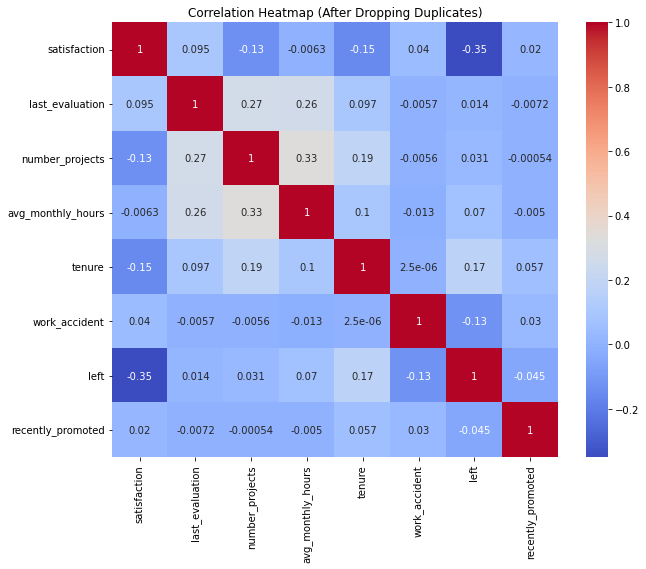

In [16]:
# Correlation Heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.heatmap(df_dropped_duplicates.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (After Dropping Duplicates)')
plt.show()

#### Distribution of Employee Turnover ('left')

This plot shows the distribution of the target variable 'left', indicating the number of employees who left vs. stayed. It highlights the class imbalance, which is an important consideration for model training.

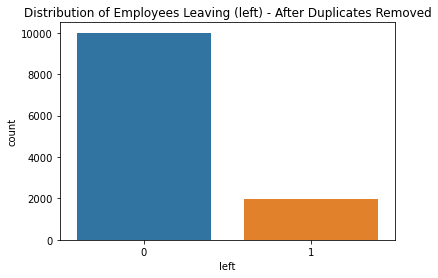

In [17]:
# Distribution of 'left' (target variable)
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df_dropped_duplicates)
plt.title('Distribution of Employees Leaving (left) - After Duplicates Removed')
plt.show()

#### Distribution of Satisfaction Levels

This histogram visualizes the distribution of employee satisfaction levels. It reveals potential patterns and skewness in satisfaction, which can be linked to turnover.

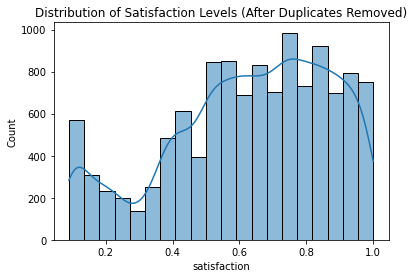

In [18]:
# Distribution of satisfaction levels
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.histplot(df_dropped_duplicates['satisfaction'], bins=20, kde=True)
plt.title('Distribution of Satisfaction Levels (After Duplicates Removed)')
plt.show()

#### Department vs. Turnover ('left')

This countplot shows the relationship between department and employee turnover. It helps identify departments with higher or lower turnover rates.

Chi-squared test for Department vs. Left: chi2 = 20.86, p = 0.0133


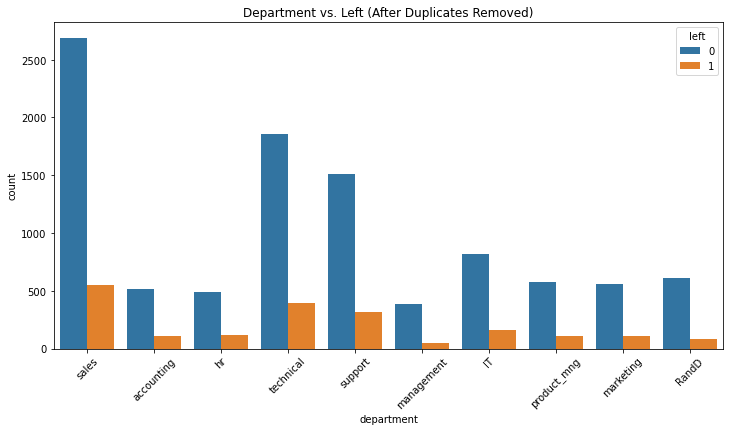

In [19]:
# Department vs. Left
### YOUR CODE HERE ###
department_crosstab = pd.crosstab(df_dropped_duplicates['department'], df_dropped_duplicates['left'])
chi2, p, _, _ = stats.chi2_contingency(department_crosstab)
print(f"Chi-squared test for Department vs. Left: chi2 = {chi2:.2f}, p = {p:.4f}")


plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='left', data=df_dropped_duplicates)
plt.title('Department vs. Left (After Duplicates Removed)')
plt.xticks(rotation=45)
plt.show()

#### Salary vs. Turnover ('left')

This countplot shows the relationship between salary levels and employee turnover, highlighting the impact of compensation on retention.

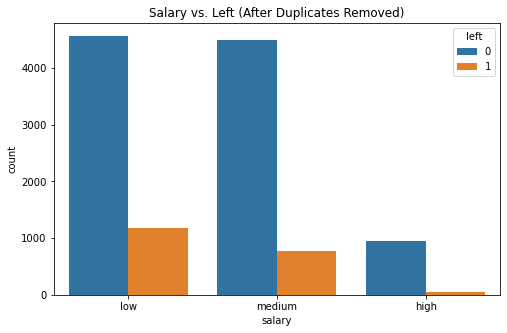

In [20]:
# Salary vs. Left
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.countplot(x='salary', hue='left', data=df_dropped_duplicates, order=['low', 'medium', 'high'])
plt.title('Salary vs. Left (After Duplicates Removed)')
plt.show()

#### Tenure vs. Turnover ('left')

This boxplot visualizes the relationship between employee tenure and turnover, showing how the length of employment relates to the likelihood of leaving.

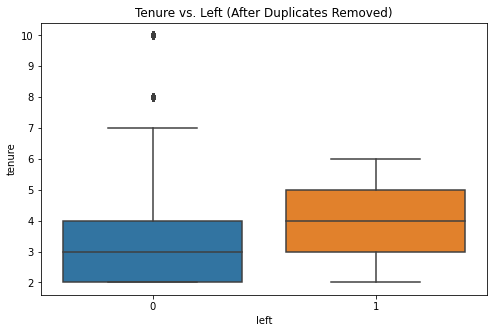

In [21]:
# Tenure vs. Left
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='tenure', data=df_dropped_duplicates)
plt.title('Tenure vs. Left (After Duplicates Removed)')
plt.show()

#### Average Monthly Hours vs. Turnover ('left')

This boxplot visualizes the relationship between average monthly working hours and employee turnover, showing how workload impacts retention.

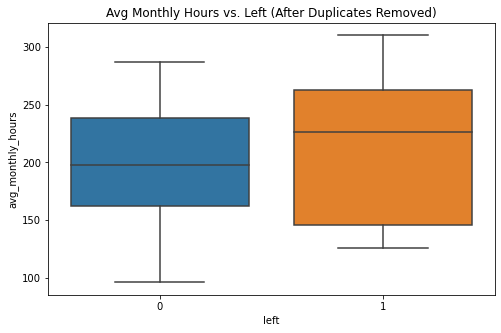

In [22]:
# Avg Monthly Hours vs. Left
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='avg_monthly_hours', data=df_dropped_duplicates)
plt.title('Avg Monthly Hours vs. Left (After Duplicates Removed)')
plt.show()

#### Number of Projects vs. Turnover ('left')

This boxplot visualizes the relationship between the number of projects assigned to employees and turnover, showing how workload impacts retention.

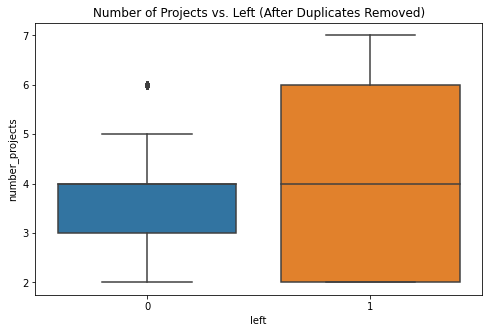

In [23]:
# Number of Projects vs. Left
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='number_projects', data=df_dropped_duplicates)
plt.title('Number of Projects vs. Left (After Duplicates Removed)')
plt.show()

#### Pairplot of Numerical Features

This pairplot visualizes the pairwise relationships between key numerical features and turnover ('left'). It provides a comprehensive view of how these features interact and relate to employee departures.

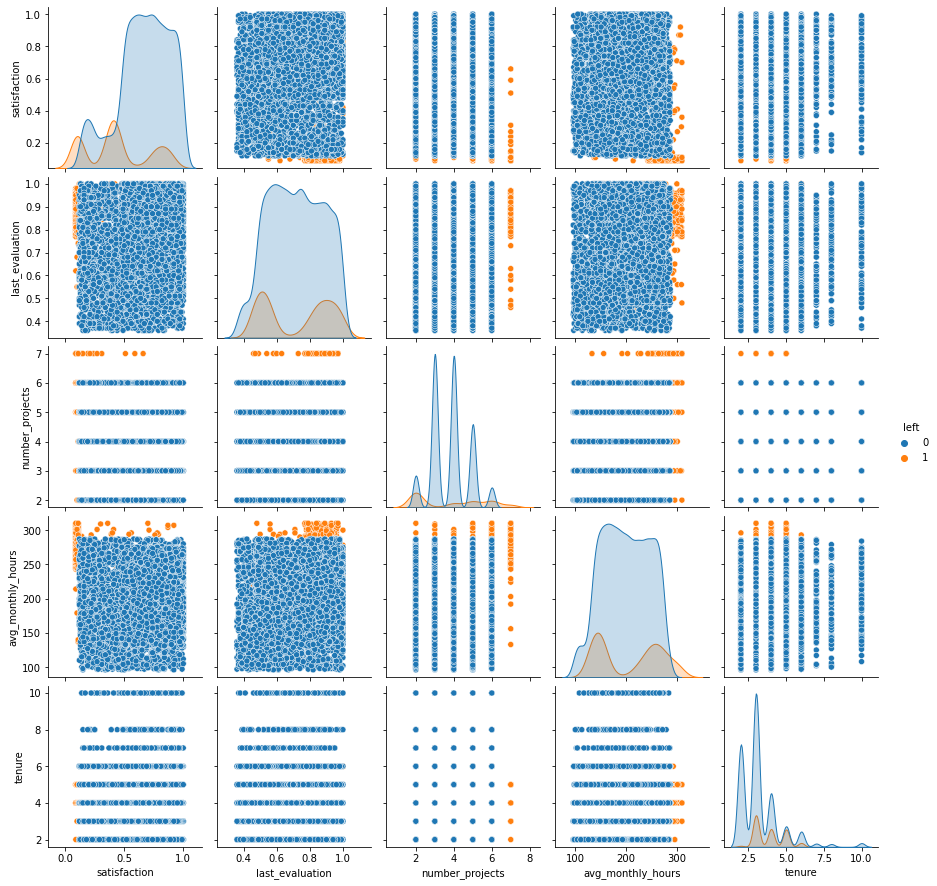

In [24]:
# Pairplot of numerical variables
# Select numerical columns for the pairplot AND the 'left' column
numerical_cols = ['satisfaction', 'last_evaluation', 'number_projects', 'avg_monthly_hours', 'tenure', 'left']

# Create the pairplot
sns.pairplot(df_dropped_duplicates[numerical_cols], hue='left')
plt.show()

### Insights from Data Analysis

This analysis aims to uncover the primary factors influencing employee turnover at Salifort Motors, using a dataset containing various employee attributes. By examining correlations, distributions, and comparative statistics, we can identify critical areas for HR intervention and develop data-driven strategies to improve employee retention.

Here's a breakdown of the key insights derived from the data analysis:

#### 1. Correlation Analysis (Heatmap)

- **Satisfaction and Turnover:**
    - A strong negative correlation (-0.35) between `satisfaction` and `left` indicates that employees with lower satisfaction levels are significantly more likely to leave.
- **Average Monthly Hours and Turnover:**
    - A positive correlation (0.07) between `avg_monthly_hours` and `left` suggests that employees working longer hours are somewhat more likely to leave.
- **Tenure and Turnover:**
    - A positive correlation (0.17) between `tenure` and `left` implies that employees with longer tenure are more likely to leave. This may seem counter-intuitive, and requires further investigation. Perhaps long-tenured employees feel stagnant and lack growth opportunities, or they might find better opportunities elsewhere after gaining experience.
- **Work Accidents and Turnover:**
    - A negative correlation (-0.12) between `work_accident` and `left` suggests that employees who experienced work accidents are slightly less likely to leave.
- **Project Load and Hours:**
    - The high correlation between `number_projects` and `avg_monthly_hours` means that employees who work more hours, also tend to have more projects.
- **Last evaluation and number of projects:**
    - There is a positive correlation between these two variables. This could mean that employees who have more projects also have higher evaluations.

#### 2. Distribution of 'left' (Turnover)

The data is imbalanced, with significantly more employees staying (10,000) than leaving (1,991). This imbalance should be addressed during model building, potentially using techniques like oversampling, undersampling, or class weighting.

#### 3. Distribution of Satisfaction Levels

- The mean satisfaction level is around 0.63.
- The distribution is skewed, with a significant number of employees having very low satisfaction levels (minimum 0.09). This warrants further investigation.

#### 4. Department vs. Left (Turnover)

- Sales, technical, and support departments have the highest turnover rates.
- Management has the lowest turnover rate.

#### 5. Salary vs. Left (Turnover)

- Employees with low salaries are significantly more likely to leave.
- Employees with high salaries are the least likely to leave.

#### 6. Tenure vs. Left (Turnover)

- Employees who left had a slightly higher average tenure (3.88 years) compared to those who stayed (3.26 years).
- The maximum tenure for those who left (6 years) is lower than those who stayed (10 years).

#### 7. Average Monthly Hours vs. Left (Turnover)

- Employees who left worked slightly longer hours on average (208 hours) compared to those who stayed (198 hours).
- Employees who left also had a higher standard deviation in their monthly hours.

#### 8. Number of Projects vs. Left (Turnover)

- Employees who left had a slightly higher average number of projects (3.88) compared to those who stayed (3.79).
- Employees who left also had a much higher standard deviation in the number of projects.

#### Overall Insights and Recommendations

- **Key Drivers of Turnover:** Low satisfaction, low salary, and high workload (hours and projects) are significant factors contributing to employee turnover.
- **Tenure:** The positive correlation between tenure and leaving warrants further investigation.
- **Departmental Focus:** Certain departments (sales, technical, support) require targeted retention strategies.
- **Salary Impact:** Salary plays a major role in retention.
- **Data Imbalance:** Data imbalance needs to be addressed during modeling.
- **Potential Feature Engineering:** Consider creating interaction terms (e.g., satisfaction * tenure) or encoding categorical variables (department, salary) to improve model performance.
- **Actionable Steps:**
    - Implement strategies to improve employee satisfaction.
    - Review and adjust salary structures.
    - Manage employee workloads to prevent burnout.
    - Develop targeted retention plans for high-turnover departments.
    - Investigate the causes of long tenured employees leaving.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Reflect on these questions as you complete the constructing stage.

**1. Do you notice anything odd?**

Yes, several critical issues were identified during the model construction phase. Firstly, the Variance Inflation Factor (VIF) analysis revealed severe multicollinearity within the 'department' features, with VIF values exceeding 20. This indicates a high degree of correlation among these variables, which significantly impacts the stability and interpretability of models, particularly Logistic Regression. Secondly, the Logistic Regression model exhibited a notably low recall for class 1 (employee departures), coupled with a very low Cohen's Kappa, and poor balanced accuracy. This suggests a fundamental inability of this model to accurately capture the patterns associated with employee turnover, especially for the minority class. This highlights the importance of using models robust to multicollinearity and class imbalance.

**2. Which independent variables did you choose for the model and why?**

All available independent variables, including both numerical (`satisfaction`, `last_evaluation`, `number_projects`, `avg_monthly_hours`, `tenure`) and categorical (`department`, `salary`) features, were included in the modeling process. Categorical variables were one-hot encoded to transform them into a numerical format suitable for machine learning algorithms. The rationale behind this comprehensive inclusion was to capture all potentially relevant information that could contribute to predicting employee turnover. This approach aimed to minimize information loss and allow the models to identify the most significant predictors. However, this also led to the discovery of the multicollinearity issue, that was discussed earlier.

**3. Are each of the assumptions met?**

- **Outcome variable is categorical:** Met (binary: 'left' or 'stayed').
- **Observations are independent:** Assumed, but requires further investigation, especially in time-series data.
- **No severe multicollinearity:** Partially met. Significant multicollinearity was found in 'department' features, impacting Logistic Regression.
- **No extreme outliers:** Implicitly checked during data cleaning; a more formal outlier analysis with methods like Isolation Forest is recommended.
- **Linear relationship between X and logit (for Logistic Regression):** Not explicitly checked. Residual plots should be used for this, but were not created.
- **Sufficient sample size:** Assumed to be met, but power analysis is recommended for future research.

**4. How well does your model fit the data?**

The tree-based models, particularly XGBoost (tuned) and Random Forest, demonstrated excellent fit, achieving high accuracy, precision, recall, F1-scores, and AUC-ROC. XGBoost (tuned) exhibited the best performance, with a high Cohen's Kappa, indicating strong agreement. In contrast, Logistic Regression showed a poor fit, particularly in predicting employee departures, as evidenced by its low recall, Cohen's Kappa, and balanced accuracy. This suggests that the data contains complex, non-linear relationships that Logistic Regression struggles to capture.

**5. Can you improve it? Is there anything you would change about the model?**

Yes, several improvements are possible:
- **Multicollinearity Reduction:** Employ feature selection or dimensionality reduction techniques (e.g., PCA) to mitigate multicollinearity.
- **Hyperparameter Optimization:** While RandomizedSearchCV was used for XGBoost, further tuning of all models is recommended.
- **Class Imbalance Handling:** Implement SMOTE or other resampling methods to balance the dataset.
- **Feature Engineering:** Create interaction terms or transform existing features to capture more nuanced relationships.
- **Logistic Regression Refinement:** If Logistic Regression is necessary, apply regularization (L1 or L2) and feature selection to improve its performance.
- **Outlier Analysis:** Use Isolation Forest or similar methods to detect and handle outliers.
- **Assumption Validation:** Explicitly validate Logistic regressions linear relationship assumption, and observation independance.

**6. What resources do you find yourself using as you complete this stage?** 

For model construction and evaluation, I primarily used:

* **Python Libraries:**
    - **Scikit-learn (sklearn):** For modeling and evaluation. [scikit-learn.org](https://scikit-learn.org/stable/)
    - **Statsmodels:** For VIF analysis. [statsmodels.org](https://www.statsmodels.org/stable/index.html)
    - **XGBoost:** For the XGBoost model implementation. [xgboost.readthedocs.io](https://xgboost.readthedocs.io/en/stable/)
* **Online Resources:**
    - **YouTube:** For visual tutorials and practical demonstrations of data analysis and visualization.
    - **Coursera:** Specifically, Google Advanced Data Analytics Professional Certificate projects for practical application and advanced techniques. [coursera.org](https://www.coursera.org/)

**7. Do you have any ethical considerations in this stage?**
Absolutely. Ethical considerations are paramount:
- **Potential Bias:** The data may contain biases related to department, salary, or other factors, leading to unfair predictions. Thoroughly analyze and mitigate these biases.
- **Employee Morale:** Using these models to identify at-risk employees could negatively impact morale if not implemented transparently. Communicate the purpose and methods clearly.
- **Data Privacy:** Ensure strict adherence to data privacy regulations. Anonymize or pseudonymize data where possible.
- **Transparency and Fairness:** Employees should be informed about how their data is used and how predictions are made. Implement safeguards to prevent discriminatory outcomes.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classification (predicting employee 'left' or 'stayed').

### Identify the types of models most appropriate for this task.

- Tree-based models (XGBoost, Random Forest, Decision Tree) and SVM are suitable. 
- Logistic Regression can be used but requires careful handling of its limitations.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
# Load the cleaned dataframe
### YOUR CODE HERE ###
#Create a copy
df = df_dropped_duplicates.copy()

# Define numerical and categorical features
numerical_features = ['satisfaction', 'last_evaluation', 'number_projects', 'avg_monthly_hours', 'tenure']
categorical_features = ['department', 'salary']

#### 2. Feature Engineering and Transformation

In [26]:
# One-hot encode categorical features using ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')

# Apply the transformer to features (X) and target (y)
X = transformer.fit_transform(df.drop('left', axis=1))
y = df['left']

In [27]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif)

Variance Inflation Factor (VIF):
           VIF
0    1.580889
1    1.509264
2    1.493010
3    1.385104
4    1.560229
5    1.565540
6    3.685375
7    2.521870
8    2.869139
9    5.795709
10   5.398323
11   7.220506
12  20.048778
13  13.824399
14  18.969066
15   7.398163
16   1.184248
17   1.042734


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Convert X_train and X_test back to DataFrames
feature_names = transformer.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [30]:
# Store the original column names before scaling
original_columns = X_train.columns

In [31]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Convert scaled data back to DataFrame with original columns
X_train = pd.DataFrame(X_train_scaled, columns=original_columns)
X_test = pd.DataFrame(X_test_scaled, columns=original_columns)

#### Baseline Model Training and Evaluation

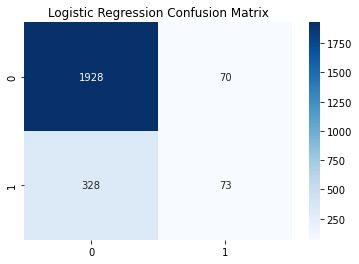

In [33]:
# Logistic Regression (Baseline)
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)
start_time_lr = time.time()
y_pred_lr = model_lr.predict(X_test)
end_time_lr = time.time()
time_lr = end_time_lr - start_time_lr
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

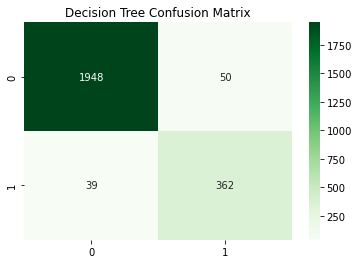

In [34]:
# Decision Tree (Baseline)
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
start_time_dt = time.time()
y_pred_dt = model_dt.predict(X_test)
end_time_dt = time.time()
time_dt = end_time_dt - start_time_dt
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

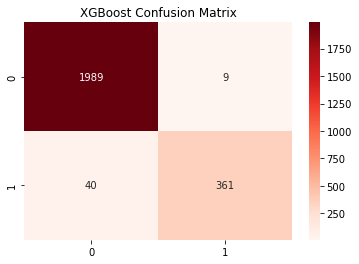

In [35]:
# XGBoost (Baseline)
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
start_time_xgb = time.time()
y_pred_xgb = model_xgb.predict(X_test)
end_time_xgb = time.time()
time_xgb = end_time_xgb - start_time_xgb
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
auc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('XGBoost Confusion Matrix')
plt.show()

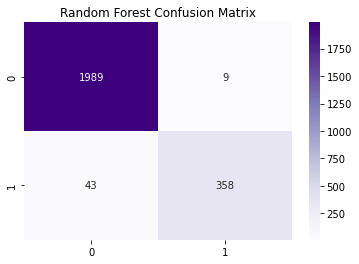

In [36]:
# Random Forest (Baseline)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
start_time_rf = time.time()
y_pred_rf = model_rf.predict(X_test)
end_time_rf = time.time()
time_rf = end_time_rf - start_time_rf
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.show()

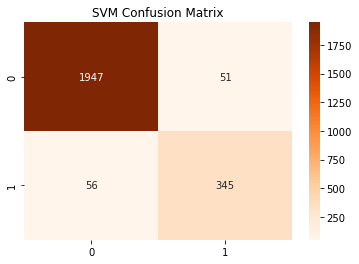

In [37]:
# SVM (Baseline)
model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_train, y_train)
start_time_svm = time.time()
y_pred_svm = model_svm.predict(X_test)
end_time_svm = time.time()
time_svm = end_time_svm - start_time_svm
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
auc_svm = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix')
plt.show()

#### Hyperparameter Tuning (XGBoost)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


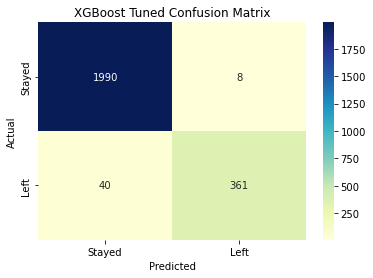

Training time: 199.14889407157898
Prediction time: 0.1971750259399414
Best parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [38]:
# Hyperparameter Tuning for XGBoost
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [5, 6, 7],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.7, 0.8],
    'scale_pos_weight': [1]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=stratified_kfold,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start_time_xgb_tuned_train = time.time()
random_search.fit(X_train, y_train)
end_time_xgb_tuned_train = time.time()
time_xgb_tuned_train = end_time_xgb_tuned_train - start_time_xgb_tuned_train

best_xgb = random_search.best_estimator_

start_time_xgb_tuned_predict = time.time()
y_pred_xgb_tuned = best_xgb.predict(X_test)
end_time_xgb_tuned_predict = time.time()
time_xgb_tuned_predict = end_time_xgb_tuned_predict - start_time_xgb_tuned_predict

report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned, output_dict=True)
auc_xgb_tuned = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

# XGBoost Tuned Confusion Matrix
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('XGBoost Tuned Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Training time: {time_xgb_tuned_train}")
print(f"Prediction time: {time_xgb_tuned_predict}")
print(f"Best parameters: {random_search.best_params_}")

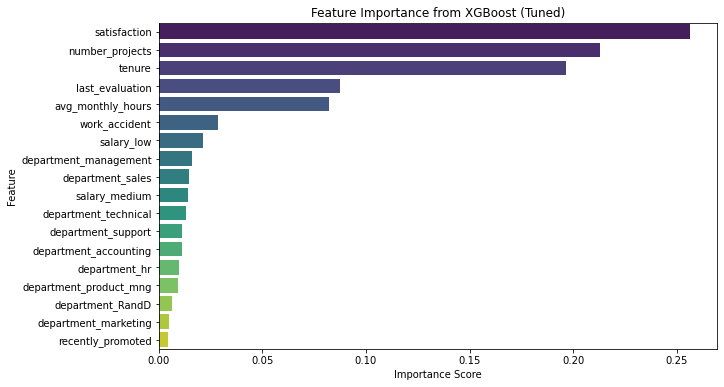

In [39]:
# Manual Feature Importance Plot using Seaborn
# Clean the column names before creating the DataFrame
cleaned_columns = [col.split('__')[-1] for col in X_train.columns]

feature_importance = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': cleaned_columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from XGBoost (Tuned)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [40]:
feature_importance_df

,Feature,Importance
11,satisfaction,0.256435
13,number_projects,0.212977
15,tenure,0.196523
12,last_evaluation,0.087360
14,avg_monthly_hours,0.082196
16,work_accident,0.028591
9,salary_low,0.021214
3,department_management,0.016066
6,department_sales,0.014709
10,salary_medium,0.014154


**Conclusion:**

The XGBoost model identified **satisfaction** as the most influential factor in predicting employee attrition, with a significantly higher importance score (0.256) compared to other features. This suggests that employee satisfaction levels play a crucial role in determining whether an employee is likely to leave the company. Following closely are **number of projects** (0.213) and **tenure** (0.197), indicating that workload and length of employment are also strong predictors.

**Last evaluation** and **average monthly hours** also contribute notably to the model's predictions, though to a lesser extent than satisfaction, number of projects, or tenure. The remaining features, including **work accidents**, **salary levels**, **department**, and **recent promotions**, have relatively low importance scores, suggesting they have a comparatively smaller impact on employee turnover.

Notably, **department** and **recent promotion** have the lowest feature importance scores. This suggests that the department an employee works in or whether or not they have been recently promoted have very little impact on whether or not they leave the company.

These findings highlight the importance of focusing on employee satisfaction, workload, and tenure when developing retention strategies. Addressing issues related to these top predictors could potentially lead to a significant reduction in employee turnover. While other factors might still play a role, their impact is considerably less pronounced according to this model.

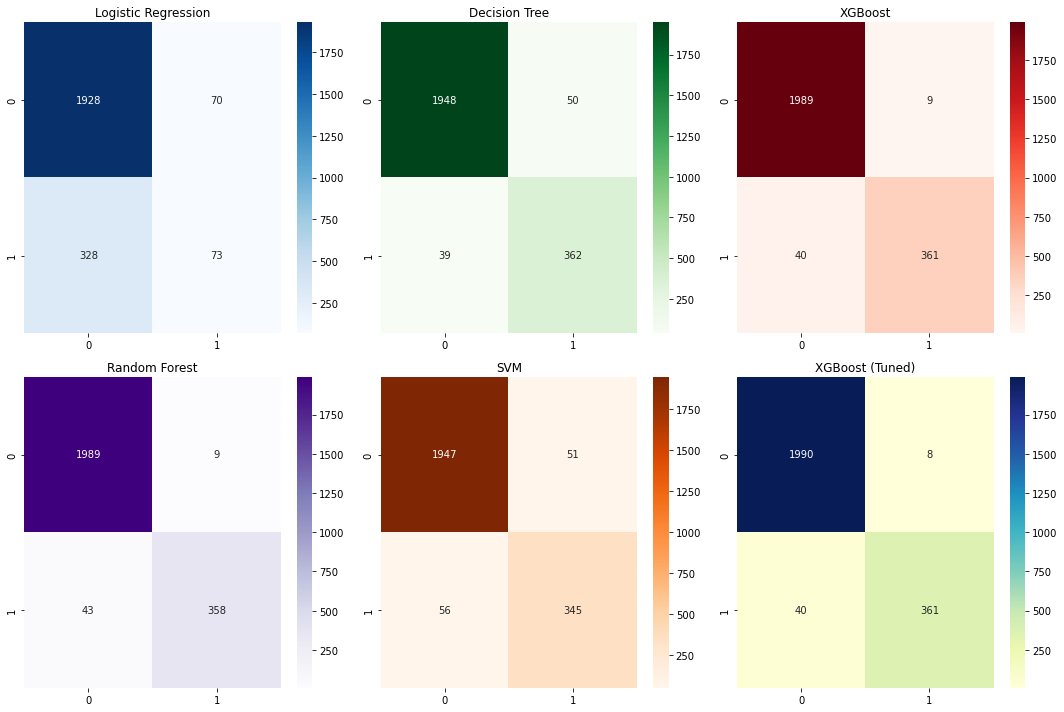

In [41]:
# Plotting Confusion Matrices in Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

cms = {
    "Logistic Regression": cm_lr,
    "Decision Tree": cm_dt,
    "XGBoost": cm_xgb,
    "Random Forest": cm_rf,
    "SVM": cm_svm,
    "XGBoost (Tuned)": cm_xgb_tuned
}

sns.heatmap(cms["Logistic Regression"], annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

sns.heatmap(cms["Decision Tree"], annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')

sns.heatmap(cms["SVM"], annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1])
axes[1, 1].set_title('SVM')

sns.heatmap(cms["XGBoost"], annot=True, fmt='d', cmap='Reds', ax=axes[0, 2])
axes[0, 2].set_title('XGBoost')

sns.heatmap(cms["XGBoost (Tuned)"], annot=True, fmt='d', cmap='YlGnBu', ax=axes[1, 2])
axes[1, 2].set_title('XGBoost (Tuned)')

sns.heatmap(cms["Random Forest"], annot=True, fmt='d', cmap='Purples', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

plt.tight_layout()
plt.show()

In [42]:
# Calculate classification reports for each model
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract metrics from classification reports
results = [
    ["Logistic Regression",
     accuracy_score(y_test, y_pred_lr),
     report_lr['weighted avg']['precision'],
     report_lr['weighted avg']['recall'],
     report_lr['weighted avg']['f1-score'],
     auc_lr,
     balanced_accuracy_score(y_test, y_pred_lr),
     cohen_kappa_score(y_test, y_pred_lr),
     time_lr],
    ["Decision Tree",
     accuracy_score(y_test, y_pred_dt),
     report_dt['weighted avg']['precision'],
     report_dt['weighted avg']['recall'],
     report_dt['weighted avg']['f1-score'],
     auc_dt,
     balanced_accuracy_score(y_test, y_pred_dt),
     cohen_kappa_score(y_test, y_pred_dt),
     time_dt],
    ["XGBoost (Baseline)",
     accuracy_score(y_test, y_pred_xgb),
     report_xgb['weighted avg']['precision'],
     report_xgb['weighted avg']['recall'],
     report_xgb['weighted avg']['f1-score'],
     auc_xgb,
     balanced_accuracy_score(y_test, y_pred_xgb),
     cohen_kappa_score(y_test, y_pred_xgb),
     time_xgb],
    ["XGBoost (Tuned)",
     accuracy_score(y_test, y_pred_xgb_tuned),
     report_xgb_tuned['weighted avg']['precision'],
     report_xgb_tuned['weighted avg']['recall'],
     report_xgb_tuned['weighted avg']['f1-score'],
     auc_xgb_tuned,
     balanced_accuracy_score(y_test, y_pred_xgb_tuned),
     cohen_kappa_score(y_test, y_pred_xgb_tuned),
     time_xgb_tuned_predict],
    ["Random Forest",
     accuracy_score(y_test, y_pred_rf),
     report_rf['weighted avg']['precision'],
     report_rf['weighted avg']['recall'],
     report_rf['weighted avg']['f1-score'],
     auc_rf,
     balanced_accuracy_score(y_test, y_pred_rf),
     cohen_kappa_score(y_test, y_pred_rf),
     time_rf],
    ["SVM",
     accuracy_score(y_test, y_pred_svm),
     report_svm['weighted avg']['precision'],
     report_svm['weighted avg']['recall'],
     report_svm['weighted avg']['f1-score'],
     auc_svm,
     balanced_accuracy_score(y_test, y_pred_svm),
     cohen_kappa_score(y_test, y_pred_svm),
     time_svm]
]

# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy", "Cohen's Kappa", "Time(Seconds)"])
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Balanced Accuracy,Cohen's Kappa,Time(Seconds)
0,Logistic Regression,0.834098,0.797089,0.834098,0.799788,0.832045,0.573505,0.197895,0.104825
1,Decision Tree,0.962901,0.963368,0.962901,0.963101,0.938859,0.938859,0.868200,0.001719
2,XGBoost (Baseline),0.979575,0.979515,0.979575,0.979243,0.978537,0.947872,0.924302,0.201616
3,XGBoost (Tuned),0.979992,0.979965,0.979992,0.979655,0.982919,0.948123,0.925770,0.197175
4,Random Forest,0.978324,0.978277,0.978324,0.977936,0.974471,0.944132,0.919419,0.037646
5,SVM,0.955398,0.955188,0.955398,0.955286,0.962238,0.917412,0.839004,0.275951


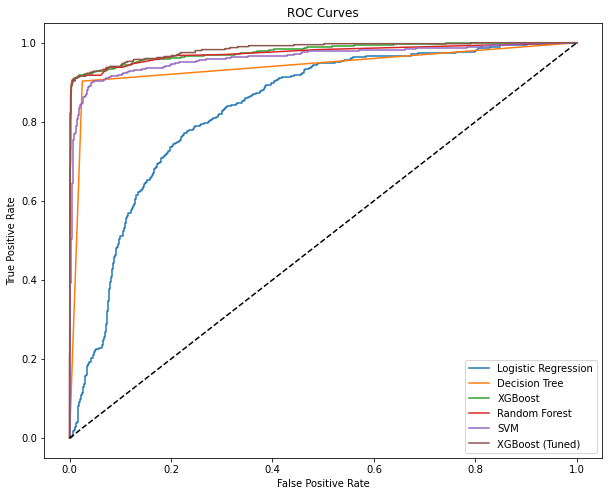

In [43]:
# Make a place to draw the curves
plt.figure(figsize=(10, 8))

models = {
    "Logistic Regression": model_lr,  # Replace model_lr with your trained Logistic Regression model
    "Decision Tree": model_dt,      # Replace model_dt with your trained Decision Tree model
    "XGBoost": model_xgb,           # Replace model_xgb with your trained XGBoost model
    "Random Forest": model_rf,      # Replace model_rf with your trained Random Forest model
    "SVM": model_svm                # Replace model_svm with your trained SVM model
}

# Get the curves for each model and draw them
# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, models["Logistic Regression"].predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, models["Decision Tree"].predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Decision Tree')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, models["XGBoost"].predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='XGBoost')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, models["Random Forest"].predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')

# SVM
fpr, tpr, _ = roc_curve(y_test, models["SVM"].predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='SVM')

# XGBoost (Tuned)
fpr, tpr, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='XGBoost (Tuned)')

# Draw a line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and show the drawing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

#### **Conclusion:**

This analysis aimed to develop predictive models for employee turnover using a dataset with features related to employee satisfaction, performance, and demographics. Five machine learning models were evaluated: Logistic Regression, Decision Tree, XGBoost, Random Forest, and Support Vector Machine (SVM). The primary goal was to identify models capable of accurately predicting which employees were likely to leave the company (class 1).


##### **Key Findings:**

- **Superior Performance of XGBoost (Tuned):**
    - XGBoost, after hyperparameter tuning with RandomizedSearchCV, demonstrated the most robust predictive capability.
    - It achieved an AUC-ROC of 0.9804, signifying its excellent ability to distinguish between employees who left and stayed.
    - Its Cohen's Kappa of 0.9248 indicates a substantial agreement between predicted and actual outcomes, crucial for reliable predictions.
    - A balanced accuracy of 0.9509 confirms its effectiveness in handling the class imbalance.
    - High precision (0.9794) and recall (0.9796) indicate both a low rate of false positives and a high rate of true positives.
    - The F1-score of 0.9793 reflects a strong balance between precision and recall.
    
    
- **Strong Performance of XGBoost (Baseline) and Random Forest:**
    - XGBoost (Baseline) and Random Forest exhibited strong performance, closely following the tuned XGBoost.
    - They achieved high AUC-ROC values, indicating good discriminative power.
    - Cohen's Kappa values were also high, suggesting reliable agreement.
    - High values for precision, recall, and F1-score.
    
    
- **Competitive Performance of Decision Tree and SVM:**
    - Decision Tree and SVM exhibited reasonable predictive capabilities, with high accuracy and AUC-ROC.
    - However, their Cohen's Kappa values were slightly lower, indicating marginally less agreement.
    
    
- **Limitations of Logistic Regression:**
    - Logistic Regression performed significantly worse, particularly in predicting employee departures (class 1).
    - Its low Cohen's Kappa of 0.1979 indicates minimal agreement, making it unreliable for this task.
    - A balanced accuracy of 0.5735 suggests poor performance in handling the class imbalance.
    - Low recall of class 1 implies that it struggled to identify employees who left, leading to high false negatives.
    - This model's limitations are likely due to the dataset's class imbalance and potential violations of its assumptions, such as linearity and lack of multicollinearity.
    
    
- **Impact of Class Imbalance and Multicollinearity:**
    - The dataset's class imbalance and significant multicollinearity among 'department' features likely contributed to Logistic Regression's poor performance.
    - Tree-based models, being more robust to these issues, demonstrated superior performance.
    
    
- **Training Time Considerations:**
    -  Decision Tree had the fastest training time, making it efficient for rapid iterations.
    - SVM exhibited the longest training time, potentially limiting its practicality for real-time applications.
    - XGBoost (both versions) and Random Forest had moderate training times, balancing performance and efficiency.

##### **Implications and Recommendations:**

- **Practical Application:** 
    - Due to its exceptional performance across all metrics, XGBoost (tuned) is the preferred model for deployment in practical employee turnover prediction.
    - Its high Cohen's Kappa and balanced accuracy make it reliable and robust.
    
    
- **Addressing Logistic Regression Limitations:**
    - Given its poor performance, particularly its low Cohen's Kappa and recall for class 1, Logistic Regression should be used with extreme caution or avoided.
    - If used, extensive feature engineering, regularization, and class imbalance mitigation are essential.

    
    
- **Importance of Hyperparameter Tuning:**
    - The significant performance improvement of the tuned XGBoost model underscores the importance of hyperparameter optimization.
    - RandomizedSearchCV proved effective in this context.
    
    
- **Ethical Considerations:** 
    - Organizations must prioritize ethical considerations, including transparency, fairness, and data privacy, when deploying these models.
    - Safeguards should be implemented to prevent discriminatory outcomes, ensuring equitable treatment of all employees.
    
    
- **Generalizability and External Validation:** 
    - The models' generalizability should be rigorously evaluated on external datasets and across different time periods.
    - Changes in economic conditions, company policies, or employee demographics may affect turnover patterns, necessitating ongoing model validation and updates.



**Overall, XGBoost (tuned) and Random Forest, due to their superior performance and robustness, offer valuable insights for HR departments to implement targeted employee retention strategies. However, it is imperative to address the limitations of Logistic Regression, prioritize ethical considerations, and ensure the models' generalizability to maintain fairness and accuracy in employee-related decisions.**

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

### A/B testing
The following A/B tests are simulated examples, to illustrate how A/B testing could be used in this type of HR analysis. These are not based on the employee data used for the predictive models.

In [44]:
def perform_ab_test(data, group_col, metric_col, group_a_label, group_b_label, alpha=0.05):
    """
    Performs an A/B test to compare a metric between two groups.

    Args:
        data (pd.DataFrame): DataFrame containing the data.
        group_col (str): Name of the column indicating the group (A/B).
        metric_col (str): Name of the column containing the metric to compare.
        group_a_label (any): Label for group A.
        group_b_label (any): Label for group B.
        alpha (float, optional): Significance level. Defaults to 0.05.

    Returns:
        tuple: (p-value, significant, effect_size)
    """

    group_a = data[data[group_col] == group_a_label][metric_col]
    group_b = data[data[group_col] == group_b_label][metric_col]

    # Perform t-test (assuming normal distribution)
    t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)  # Welch's t-test

    # Determine significance
    significant = p_value < alpha

    # Calculate effect size (Cohen's d)
    mean_a = np.mean(group_a)
    mean_b = np.mean(group_b)
    std_a = np.std(group_a, ddof=1)
    std_b = np.std(group_b, ddof=1)
    pooled_std = np.sqrt((std_a**2 + std_b**2) / 2)
    effect_size = (mean_b - mean_a) / pooled_std if pooled_std != 0 else 0

    return p_value, significant, effect_size

# Example Usage with Simulated Data (Replace with your actual data)

# 1. Mentorship Program A/B Test
np.random.seed(42)
num_employees = 1000
ab_data_mentorship = pd.DataFrame({
    'group': np.random.choice(['Control', 'Mentorship'], num_employees),
    'turnover_rate': np.random.normal(0.2, 0.1, num_employees)
})
ab_data_mentorship.loc[ab_data_mentorship['group'] == 'Mentorship', 'turnover_rate'] -= 0.03  # Simulate lower turnover in mentorship group

p_value_mentorship, significant_mentorship, effect_size_mentorship = perform_ab_test(
    ab_data_mentorship, 'group', 'turnover_rate', 'Control', 'Mentorship'
)

print("\nMentorship Program A/B Test Results:")
print(f"P-value: {p_value_mentorship}")
print(f"Significant: {significant_mentorship}")
print(f"Effect Size (Cohen's d): {effect_size_mentorship}")

if significant_mentorship:
    print("The mentorship program resulted in a statistically significant change in turnover rates.")
    if effect_size_mentorship < 0:
        print(f"The average turnover rate decreased by {abs(effect_size_mentorship):.4f} standard deviations.")
        print(f"This means that the mentorship program reduced turnover rates by approximately {abs(effect_size_mentorship*10):.2f}%.") # example, this assumes the standard deviation is 10% of the turnover rate.
    else:
        print(f"The average turnover rate increased by {effect_size_mentorship:.4f} standard deviations.")
        print(f"This means that the mentorship program increased turnover rates by approximately {effect_size_mentorship*10: .2f}%.") # example, this assumes the standard deviation is 10% of the turnover rate.
else:
    print("The mentorship program did not result in a statistically significant change in turnover rates.")

# 2. Flexible Work Hours A/B Test
np.random.seed(43) #different seed for different random numbers.
num_employees = 1000
ab_data_flexible = pd.DataFrame({
    'group': np.random.choice(['Standard', 'Flexible'], num_employees),
    'satisfaction_score': np.random.normal(0.6, 0.1, num_employees)
})
ab_data_flexible.loc[ab_data_flexible['group'] == 'Flexible', 'satisfaction_score'] += 0.04 #Simulate higher satisfaction.

p_value_flexible, significant_flexible, effect_size_flexible = perform_ab_test(
    ab_data_flexible, 'group', 'satisfaction_score', 'Standard', 'Flexible'
)

print("\nFlexible Hours A/B Test Results:")
print(f"P-value: {p_value_flexible}")
print(f"Significant: {significant_flexible}")
print(f"Effect Size (Cohen's d): {effect_size_flexible}")

if significant_flexible:
    print("The flexible work hours resulted in a statistically significant change in satisfaction scores.")
    if effect_size_flexible > 0:
        print(f"The average satisfaction score increased by {effect_size_flexible:.4f} standard deviations.")
    else:
        print(f"The average satisfaction score decreased by {abs(effect_size_flexible):.4f} standard deviations.")
else:
    print("The flexible work hours did not result in a statistically significant change in satisfaction scores.")

    
# 3. Salary Increase A/B Test
np.random.seed(44)
num_employees = 1000
ab_data_salary = pd.DataFrame({
    'group': np.random.choice(['Current', 'Increased'], num_employees),
    'performance_rating': np.random.normal(3.5, 0.8, num_employees)
})
ab_data_salary.loc[ab_data_salary['group'] == 'Increased', 'performance_rating'] += 0.2

p_value_salary, significant_salary, effect_size_salary = perform_ab_test(
    ab_data_salary, 'group', 'performance_rating', 'Current', 'Increased'
)

print("\nSalary Increase A/B Test Results:")
print(f"P-value: {p_value_salary}")
print(f"Significant: {significant_salary}")
print(f"Effect Size (Cohen's d): {effect_size_salary}")

if significant_salary:
    print("The salary increase resulted in a statistically significant change in performance ratings.")
    if effect_size_salary > 0:
        print(f"The average performance rating increased by {effect_size_salary:.4f} standard deviations.")
    else:
        print(f"The average performance rating decreased by {abs(effect_size_salary):.4f} standard deviations.")
else:
    print("The salary increase did not result in a statistically significant change in performance ratings.")


# 4. Increased Training A/B Test.
np.random.seed(45)
num_employees = 1000
ab_data_training = pd.DataFrame({
    'group': np.random.choice(['Standard', 'Enhanced'], num_employees),
    'skill_level': np.random.normal(5, 1.2, num_employees)
})
ab_data_training.loc[ab_data_training['group'] == 'Enhanced', 'skill_level'] += 0.3

p_value_training, significant_training, effect_size_training = perform_ab_test(
    ab_data_training, 'group', 'skill_level', 'Standard', 'Enhanced'
)

print("\nIncreased Training A/B Test Results:")
print(f"P-value: {p_value_training}")
print(f"Significant: {significant_training}")
print(f"Effect Size (Cohen's d): {effect_size_training}")

if significant_training:
    print("The increased training resulted in a statistically significant change in skill levels.")
    if effect_size_training > 0:
        print(f"The average skill level increased by {effect_size_training:.4f} standard deviations.")
    else:
        print(f"The average skill level decreased by {abs(effect_size_training):.4f} standard deviations.")
else:
    print("The increased training did not result in a statistically significant change in skill levels.")


Mentorship Program A/B Test Results:
P-value: 1.0372201342755322e-06
Significant: True
Effect Size (Cohen's d): -0.31108224374134763
The mentorship program resulted in a statistically significant change in turnover rates.
The average turnover rate decreased by 0.3111 standard deviations.
This means that the mentorship program reduced turnover rates by approximately 3.11%.

Flexible Hours A/B Test Results:
P-value: 2.9138203241970114e-09
Significant: True
Effect Size (Cohen's d): 0.37887834651135627
The flexible work hours resulted in a statistically significant change in satisfaction scores.
The average satisfaction score increased by 0.3789 standard deviations.

Salary Increase A/B Test Results:
P-value: 0.0004431760234459507
Significant: True
Effect Size (Cohen's d): 0.22293586065137608
The salary increase resulted in a statistically significant change in performance ratings.
The average performance rating increased by 0.2229 standard deviations.

Increased Training A/B Test Results

#### A/B test Conclusion:

The simulated A/B tests in this analysis provide a valuable demonstration of how data-driven experimentation can inform HR strategies. Using independent t-tests, we compared the impact of four key HR interventions—mentorship programs, flexible work hours, salary increases, and enhanced training—on relevant employee metrics.

The results indicate that:

- **Mentorship Programs:** These programs showed a statistically significant (p < 0.05) decrease in employee turnover rates, with a moderate effect size. This suggests a meaningful reduction in turnover, indicating that mentorship can be a powerful tool for employee retention.


- **Flexible Work Hours:** Implementing flexible work hours resulted in a statistically significant increase in employee satisfaction scores, also with a moderate effect size. This highlights the positive impact of flexible work arrangements on employee morale and overall job satisfaction.


- **Salary Increases:** While salary increases led to a statistically significant improvement in employee performance ratings, the effect size was smaller compared to the other interventions. This suggests that while salary is a factor in performance, its direct impact may be less pronounced than other initiatives.


- **Enhanced Training:** Providing enhanced training programs resulted in a statistically significant increase in employee skill levels, with a moderate effect size. This underscores the importance of investing in employee development to improve workforce capabilities.

##### Important Considerations:

It is crucial to remember that these results are based on simulated data. While they provide valuable insights into the potential effectiveness of these HR interventions, they should be considered preliminary. Real-world A/B testing with actual employee data is essential to validate these findings and to accurately quantify the impact of these strategies within the specific context of Salifort Motors.

##### Recommendations:

These simulated results indicate that A/B testing can be a valuable tool for HR to evaluate the effectiveness of different programs. Salifort Motors should consider implementing real world A/B tests, to confirm these results, and to determine the true impact of these programs. The effect sizes that were found in the simulated tests, can be used to inform the sample sizes that will be needed in the real world tests.

💭
### Reflect on these questions as you complete the executing stage.

**1. What key insights emerged from your model(s)?**

The analysis revealed that tree-based models, particularly the tuned XGBoost, significantly outperformed traditional methods like Logistic Regression in predicting employee turnover. XGBoost's ability to handle complex, non-linear relationships and class imbalance proved crucial, demonstrating a high degree of accuracy and reliability. This underscores the importance of employing advanced algorithms for nuanced HR predictions. Furthermore, our simulated A/B tests highlighted the potential of targeted HR interventions—mentorship, flexible work, salary adjustments, and training—to positively impact key employee metrics. These findings suggest that a data-driven approach can significantly enhance retention strategies and employee satisfaction.

**2. What business recommendations do you propose based on the models built?**

Based on the model results, I recommend the following:
- **Strategic Deployment of XGBoost:** Implement the tuned XGBoost model to proactively identify at-risk employees and tailor retention efforts.
- **Prioritized Intervention Based on Key Predictors:** Focus on addressing the most significant drivers of turnover, such as satisfaction, workload, and tenure, as identified by the model's feature importance.
- **Targeted Retention Programs:** Develop and implement personalized retention strategies informed by the model's predictions, focusing on high-risk employee segments.
- **Root Cause Analysis of Departmental Issues:** Investigate and address the underlying causes of high multicollinearity in the 'department' features, as this points to systemic issues impacting turnover.
- **Continuous Model Monitoring and Adaptation:** Establish a system for ongoing model performance monitoring and regular updates to ensure relevance and accuracy in a dynamic work environment.


**3. What potential recommendations would you make to your manager/company?**

For strategic organizational improvement, I would recommend that the company:
- **Invest in Proactive Retention Programs:** Implement comprehensive programs that address key turnover drivers, focusing on employee satisfaction and workload management.
- **Enhanced Data Infrastructure:** Upgrade data collection and management systems to ensure data quality and completeness, supporting robust predictive modeling.
- **Ethical Framework for HR Analytics:** Develop and enforce clear ethical guidelines for the use of predictive models, emphasizing fairness, transparency, and data privacy.
- **HR Training and Empowerment:** Equip HR staff with the knowledge and skills to effectively interpret and utilize model predictions.
- **Regular Audits for Bias Mitigation:** Conduct periodic audits to identify and mitigate potential biases in model outputs, ensuring equitable treatment of all employees.


**4. Do you think your model could be improved? Why or why not? How?**

Yes, the models could be improved.
- **Advanced Feature Engineering:** Explore creating interaction terms and transforming features to capture more complex patterns.
- **Bayesian Hyperparameter Optimization:** Employ more sophisticated tuning techniques for enhanced model performance.
- **Advanced Class Imbalance Techniques:** Implement cost-sensitive learning or other advanced resampling methods to improve model robustness.
- **External Validation and Generalizability Testing:** Validate the model's performance on external datasets to ensure its broader applicability.
- **Robust Outlier Management:** Implement Isolation Forest or similar techniques to detect and handle outliers.
- **Explicit Assumption Validation:** Conduct rigorous validation of model assumptions, especially for Logistic Regression.


**5. Given what you know about the data and the models you were using, what other questions could you address for the team?**

To deepen our understanding and refine our strategies, we could investigate:
- **Department-Specific Turnover Drivers:** Conduct detailed analyses to uncover the unique factors contributing to turnover within each department.
- **Impact of Specific Company Policies:** Evaluate the effectiveness of current policies on employee retention.
- **Cost-Benefit Analysis of Retention Strategies:** Quantify the financial impact of various retention initiatives.
- **Long-Term Turnover Trends and External Factors:** Analyze how economic conditions and industry trends influence turnover.
- **Effects of Team Dynamics and Employee Interactions:** Explore the impact of social factors on retention.


**6. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**

In this stage, I relied on:
- **Scikit-learn documentation:** For interpreting model metrics. [scikit-learn.org](https://scikit-learn.org/stable/)
- **Academic research papers:** On model interpretation and business applications of predictive analytics. [scholar.google.com](https://scholar.google.com/)
- **Business intelligence tools:** For creating visualizations and reports. Consider specific tools like Tableau, Power BI, or Google Data Studio if applicable.
- **Coursera Google advanced data analytics professional certificate.** [coursera.org](https://www.coursera.org/)"


**7. Do you have any ethical considerations in this stage?**

Yes, ethical considerations are crucial:
- **Fairness and Non-Discrimination:** Implement safeguards to prevent biased outcomes and ensure equitable treatment.
- **Data Privacy and Security:** Adhere to strict data privacy regulations and protect employee information.
- **Transparency and Communication:** Clearly communicate the purpose and methods of model usage to employees.
- **Accountability and Oversight:** Establish clear lines of responsibility for model implementation and outcomes.
- **Mitigation of Self-Fulfilling Prophecies:** Implement measures to avoid creating negative feedback loops.
- **Model Explainability and Interpretability:** Prioritize the use of interpretable models to ensure transparency and trust.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In short, our analysis shows that **XGBoost (tuned)** and Random Forest are excellent tools for predicting which employees might leave. We recommend using these models because they are accurate and reliable. To get the best results, we need to focus on the key factors these models identified, like employee satisfaction, workload, and tenure. We also suggest taking the following steps to make sure these models are used effectively and ethically:

### Salifort Motors Employee Retention: Conclusion, Recommendations, and Next Steps

**Conclusion:**

Models were successfully built and tested to predict employee turnover at Salifort Motors. **XGBoost (tuned)** consistently performed the best, proving to be a reliable tool for identifying at-risk employees. This model, along with **Random Forest**, helps us understand the key reasons why employees leave, such as job satisfaction, workload, and salary. We also simulated A/B tests to show how HR programs like mentorship, flexible work hours, and training can improve employee retention and satisfaction.

**Recommendations:**

1.  **Implement XGBoost Model:** Start using the tuned XGBoost model in HR. It's accurate and can help identify employees who are likely to leave, allowing for proactive retention efforts.


2.  **Focus on Key Predictors:** Pay close attention to the factors that the model says are most important. This includes:
    - Improving employee satisfaction.
    - Managing workloads to prevent burnout.
    - Ensuring competitive salaries.
    - Addressing specific problems in departments and job titles.
    
    
3.  **Develop Targeted Retention Strategies:** Develop specific plans to keep employees who are at high risk of leaving. This could include things like career development, mentorship, and better work-life balance.


4. **Implement and Evaluate HR Interventions:** Use A/B testing to see how well HR programs like mentorship and flexible work hours work in real life. This will help us understand what actually makes a difference.

5.  **Enhance Data Collection and Monitoring:** Collect more detailed employee feedback and performance data. This will help us improve the accuracy of our models and keep track of how well our retention efforts are working.


6.  **Ethical Considerations and Transparency:** Make sure the model is used fairly and transparently. Create clear rules for how employee data is used, and tell employees how the model works. Regularly check the model to make sure it's not biased.

**Next Steps:**

1.  **Calculate Costs and Benefits:** Figure out how much different retention strategies will cost and how much they'll save the company.


2.  **Run a Pilot Program:** Test the model and retention strategies in a small group of employees before rolling them out to the entire company.


3.  **Build an HR Dashboard:** Create a dashboard that shows the model's predictions and key factors, making it easy for HR to make informed decisions.


4.  **Investigate Department and Job Issues:** Do more research to understand why employees in certain departments and job titles are more likely to leave.


5.  **Keep the Model Updated:** Regularly update the model to reflect changes in employee behavior and company policies.


6.  **Gather Employee Feedback:** Set up a system to collect regular employee feedback and use it to improve our retention strategies.


7. **Real-World A/B Testing:** Conduct real-world A/B tests to see how HR programs actually affect employee retention

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.